NB to show how to read STScI's precompiled background estimates for the ETC.  Want to make my own bathtub curves of zody vs time.  
To read binary files, following tutorial at http://vislab-ccom.unh.edu/~schwehr/rt/python-binary-files.html

In [27]:
# File description from email V Laidler 23 March 2017
# C structure used to write the stray light binary file.
# One record per file.
#    typedef struct {
#              double pix_ra;
#              double pix_dec;
#              double pos[3];
#              double nonzodi_bg[SL_NWAVE];  // The in-field ism+cib for each pixel.
#            } sl_pix;
#              Then for every day with the target in the FOR,the following three items are written.
#              double day;
#              double zodi_bg[SL_NWAVE];  //  The combined in-field zodi for each pixel.
#              double stray_light_bg[SL_NWAVE];  //The equivalent in-field background from stray light from zodi, stellar,ism, cib
#The wavelength array is the standard one that we converged
#on last year, so they are all on the same wavelength array
#that is SL_NWAVE = 108 elements long.

In [1]:
import struct
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
thedir = "/Volumes/Apps_and_Docs/MISSIONS/JWST/Zody_bathtubs/"  # Satchmo
thedir = "/Users/jrrigby1/MISSIONS/JWST/Zody_bathtubs/" # Milk
wave_file = "updated_std_spectrum_wavelengths.txt"  # Standard wavelength array.  Should be SL_NWave=108 long
wave_array = np.loadtxt(thedir + wave_file)
myfile = "bg_samples_for_jane/sl_pix_000593.bin" #sl_pix_099422.bin" #
myfile = "bg_samples_for_jane/sl_pix_099422.bin" #
SL_NWAVE = 108  # size of wavelength array
sbet_file = open(thedir + myfile)
sbet_data = sbet_file.read()

In [38]:
print "File has", len(sbet_data), "bytes, which is", len(sbet_data)/8., "doubles"
allval = struct.unpack(str(len(sbet_data)/8) + 'd', sbet_data)
perday = 1 + SL_NWAVE*2  # size of a daily chunk
static = 5 + SL_NWAVE   # data for position, not time-variable
Ndays = (len(allval)*1.0 - static)/ perday
print "Warning, Ndays should be an integer. Is it?", Ndays
Ndays = int(Ndays)
print len(allval), "total doubles"
print " ", static, "values true for all dates, plus"
print " ", perday, "values per day for", Ndays, "days"
print len(allval) - 5 - SL_NWAVE, "values that are per day"
print "Weird, I have", len(allval) - static - perday*int(Ndays), "extra values"
RAnew = allval[0]
DECnew = allval[1]
pos = allval[2:5]
nonzodi_bg = allval[5:5+SL_NWAVE]
day            = np.zeros(Ndays)
zodi_bg        = np.zeros((Ndays,SL_NWAVE))
stray_light_bg = np.zeros((Ndays,SL_NWAVE))
for dd in range(0, int(Ndays)):
    br1 = static + dd*perday
    br2 = br1 + 1
    br3 = br2 + SL_NWAVE
    br4 = br3 + SL_NWAVE
    #print "Breaking at:", br1, br2, br3, br4
    day[dd]            = allval[br1]
    #print "DAY", day
    zodi_bg[dd, :]        = allval[br2 : br3]
    stray_light_bg[dd, :] = allval[br3 : br4]
print "DEBUG, last double was", br4
#print "DEBUGGING", zodi_bg
#print "DEBUGGING", stray_light_bg
#print "DEBUGGING", allval[SL_NWAVE +5 : SL_NWAVE+5+SL_NWAVE]
extraval = len(allval[br4 : len(allval)])
print "There are", extraval, "extra values near the beginning of the file:"
print allval[static :static+extraval+100]

File has 195904 bytes, which is 24488.0 doubles
Warning, Ndays should be an integer. Is it? 112.32718894
24488 total doubles
  113 values true for all dates, plus
  217 values per day for 112 days
24375 values that are per day
Weird, I have 71 extra values
DEBUG, last double was 24417
There are 71 extra values near the beginning of the file:
(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.1219957905e-314, 4.2439915824e-314, 8.4879831653e-314, 1.27319747483e-313, 1.6975966331e-313, 2.1219957914e-313, 2.5463949497e-313, 2.970794108e-313, 3.3951932663e-313, 3.8195924246e-313, 4.24399158287e-313, 4.66839074116e-313, 5.09278989945e-313, 5.51718905774e-313, 5.94158821604e-313, 6.36598737433e-313, 6.7903865326e-313, 7.2147856909e-313, 7.6391848492e-313, 8.0635840075e-313, 8.4879831658e-313, 8.9123823241e-313, 9.33678148237e-313, 9.76118064066e-313, 1.018557979896e-312, 1.060997895725e-312, 1.103437811554e-312, 1.145877

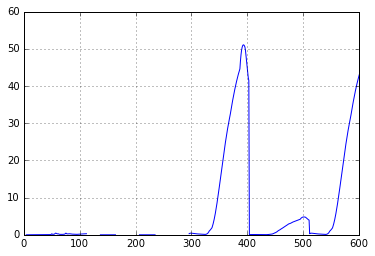

In [35]:
#plt.plot(wave_array, nonzodi_bg, label="ISM")
#plt.plot(wave_array, zodi_bg[24], label="Zodi")
#plt.plot(wave_array, stray_light_bg[0, :], label="Stray light")
#plt.legend()
plt.plot(allval)
plt.xlim(0,600)
plt.ylim(0,60)
plt.grid()